# Importings

In [1]:
# Importing basic stuff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Train test split
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Gridsearch
from sklearn.model_selection import GridSearchCV

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Reading data and making it available for analysis

In [2]:
# Naming the columns of the dataset. https://stackoverflow.com/questions/31645466/give-column-name-when-read-csv-file-pandas
colNames = ['polarity', 'title', 'text']

# Loading Dataset and assigning column names
df = pd.read_csv("./data/test.csv", names=colNames, header=None)

# Resizing the dataset, for faster computing time. A random sample from the dataset https://stackoverflow.com/questions/40986230/reduce-dataframe-size-in-pandas
df = df.sample(frac=0.1) # Get 10% of the data

In [3]:
# Looking on the data
(
    df
    #.sample(5)
    #.dtypes
    .info()
    #.loc[:,["polarity"]]
    #.loc[:,["title"]]
    #.loc[:,["text"]]
    #.value_counts()
    #.value_counts(normalize=True) # For seeing the count in %
    #.describe()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 9209 to 24579
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  40000 non-null  int64 
 1   title     39999 non-null  object
 2   text      40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
# Cleaning the data. Removing null values and only take the values that contain info.
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
df.dropna(how='any')
df = df[df['title'].notna()]
df = df[df['text'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 9209 to 24579
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  39999 non-null  int64 
 1   title     39999 non-null  object
 2   text      39999 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
# Assigning values to X and Y
xText = df.text
xTitle = df.title
y = df.polarity

xText.head(1)

9209    can't imagine a more gut wrenching tortuous em...
Name: text, dtype: object

In [6]:
# Train test split of data. Putting O at the end of the X variables for "original"
X_train, X_test, y_train, y_test = train_test_split(xText, y, test_size=0.33, random_state=42)

In [7]:
# Looking on one example
print("type of X_train: {}".format(type(X_train)))
print("length of X_train: {}".format(len(X_train)))
print("X_train[1]:\n{}".format(X_train.iloc[1500]))

type of X_train: <class 'pandas.core.series.Series'>
length of X_train: 26799
X_train[1]:
OK for drip and coarser functions, but due to the cheapness of the burr holders and excessive vibration, it cannot maintain the consistent coffee particle size needed for espresso. for that you would at least need the Gaggia MDF espresso grinder. -- The GRINDER is IMO, MORE important than the machine!


# Basics - Countvectorizer plus logistic regression

In [8]:
# Applying Count vectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_trainB = vect.transform(X_train)
X_testB = vect.transform(X_test)


In [9]:
# Looking on the vectorized features. See page 331 for code
feature_names = vect.get_feature_names_out() # under methods: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 56702
First 20 features:
['00' '000' '00000' '0004a6ab' '000th' '001' '001bk' '004' '006' '007'
 '009' '00b' '00s' '01' '010' '0123' '016' '018' '01m' '01st']
Features 20010 to 20030:
['flutter' 'fluttering' 'flutters' 'fluval' 'flux' 'flw' 'fly' 'fly6'
 'flyall' 'flyer' 'flyers' 'flyes' 'flying' 'flyingears' 'flynn' 'flys'
 'flyswatter' 'flytrap' 'flyy' 'fm']
Every 2000th feature:
['00' 'activists' 'arive' 'berlin' 'burndt' 'citizens' 'corningware'
 'denigrates' 'drinking' 'euphoric' 'fluorescent' 'gollum' 'hightened'
 'inlay' 'kf580' 'lorentson' 'messrs' 'needak' 'overflowing' 'playpen'
 'putit' 'researches' 'scenery' 'skylong' 'stirrer' 'templeton' 'tse'
 'victorious' 'wrist']


In [10]:
# Making a logistic regression model
BaseLR = LogisticRegression(max_iter=10000)

# Fitting the model
BaseLR.fit(X_trainB, y_train)


LogisticRegression(max_iter=10000)

In [11]:
# Evaluating results
y_pred = BaseLR.predict(X_testB)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.83      0.84      6624
           2       0.84      0.85      0.84      6576

    accuracy                           0.84     13200
   macro avg       0.84      0.84      0.84     13200
weighted avg       0.84      0.84      0.84     13200



In [12]:
# Confusion matrix
# Making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5531 1093]
 [1007 5569]]


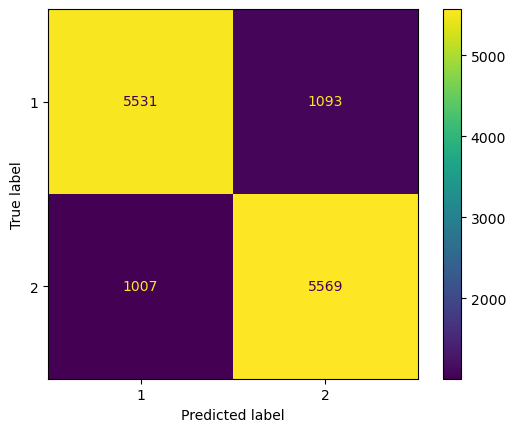

In [13]:
# Displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=BaseLR.classes_)
disp.plot()
plt.show()

# Sentiment analysis

## Predefinings

In [40]:
# Predefined Standard variables for countvectorizer and TfidTransformer
ngram_range = [(1,1),(1,2)]
use_idf = [True,False]

## Logistic Regression

In [25]:
# Making a Pipeline with Logistic Regression. Using CountVectorizer and TfidTransformer. 
pipeLR = Pipeline(steps=[
    ('preprocess', preProcess_Pipe),
    ('Model', LogisticRegression())
])

# Fitting the pipeline with data
pipeLR.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                                 ('TfidfTransformer', TfidfTransformer())])),
                ('Model', LogisticRegression())])

In [ ]:
# Pipeline for Logistic Regression
pipeLR = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', LogisticRegression())
])

# Fitting the pipeline with data
pipeLR.fit(X_train, y_train)

In [26]:
# Printing scores
print("Accuracy on training set: {:.3f}".format(pipeLR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeLR.score(X_test, y_test)))

Accuracy on training set: 0.909
Accuracy on test set: 0.849


In [20]:
# Pipeline together with gridsearchCV: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# Defining parameters for the param grid
params = {
    'CountVectorizer__ngram_range':ngram_range,
    'TfidfTransformer__use_idf':use_idf,
    'Model__C':[0.01, 0.1, 1, 10, 100],
    'Model__max_iter':[10000]
}

# Defining grid search
search = GridSearchCV(
    pipeLR,
    param_grid=params,
    cv=2,
    verbose = 1.5 # To track the progress
)

# Fitting the grid search
search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                                       ('TfidfTransformer', TfidfTransformer()),
                                       ('Model', LogisticRegression())]),
             param_grid={'CountVectorizer__ngram_range': [(1, 1), (1, 2)],
                         'Model__C': [0.01, 0.1, 1, 10, 100],
                         'Model__max_iter': [10000],
                         'TfidfTransformer__use_idf': [True, False]})

In [21]:
# Printing results
print("Accuracy on training set: {:.3f}".format(search.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(search.score(X_test, y_test)))
print("Best params: ", search.best_params_) # Printing the best params

Accuracy on training set: 1.000
Accuracy on test set: 0.885
Best params:  {'CountVectorizer__ngram_range': (1, 2), 'Model__C': 100, 'Model__max_iter': 10000, 'TfidfTransformer__use_idf': True}


## MLP

In [22]:
# Defining pipe for MLP
pipeMLP = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', MLPClassifier())
])

# Fitting the pipeline with the data
pipeMLP.fit(X_train, y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', MLPClassifier())])

In [23]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeMLP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeMLP.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.825


In [28]:
# Defining parameters for the param grid. Very intensive when it comes to computing time
params = {
    'CountVectorizer__ngram_range':ngram_range,
    'TfidfTransformer__use_idf':use_idf,
    'Model__activation':['tanh','relu'],
    #'Model__solver':['lbfgs'],
    'Model__hidden_layer_sizes':[50,100],
    'Model__max_iter':[10000]
}

# Defining grid search with the pipeline
searchMLP = GridSearchCV(
    pipeMLP,
    param_grid=params,
    cv=2,
    verbose = 1.5
)

# Fitting the grid search
searchMLP.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=50, Model__max_iter=10000, TfidfTransformer__use_idf=True; total time= 3.4min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=50, Model__max_iter=10000, TfidfTransformer__use_idf=True; total time= 3.4min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=50, Model__max_iter=10000, TfidfTransformer__use_idf=False; total time= 4.6min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=50, Model__max_iter=10000, TfidfTransformer__use_idf=False; total time= 4.8min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=100, Model__max_iter=10000, TfidfTransformer__use_idf=True; total time= 5.6min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=ta

c:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=100, Model__max_iter=10000, TfidfTransformer__use_idf=False; total time= 5.6min


In [ ]:
# Printing results for MLP
print("Accuracy on training set: {:.3f}".format(searchMLP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(searchMLP.score(X_test, y_test)))
print("Best params: ", searchMLP.best_params_) # Printing the best params

## Naive Bayes

In [37]:
# Defining pipe for Naive Bayes
pipeNB = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', MultinomialNB())
])

# Fitting the pipeline with the data
pipeNB.fit(X_train, y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', MultinomialNB())])

In [38]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeNB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeNB.score(X_test, y_test)))

Accuracy on training set: 0.891
Accuracy on test set: 0.812


In [41]:
# Defining parameters for the param grid
params = {
    'CountVectorizer__ngram_range':ngram_range,
    'TfidfTransformer__use_idf':use_idf,
    'Model__alpha':[1] # other parameters to be defined
}

# Defining grid search with the pipeline
searchNB = GridSearchCV(
    pipeNB,
    param_grid=params,
    cv=2
)

# Fitting the grid search
searchNB.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                                       ('TfidfTransformer', TfidfTransformer()),
                                       ('Model', MultinomialNB())]),
             param_grid={'CountVectorizer__ngram_range': [(1, 1), (1, 2)],
                         'Model__alpha': [1],
                         'TfidfTransformer__use_idf': [True, False]})

In [42]:
# Printing results for MultinominalNB
print("Accuracy on training set: {:.3f}".format(searchNB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(searchNB.score(X_test, y_test)))
print("Best params: ", searchNB.best_params_) # Printing the best params

Accuracy on training set: 0.967
Accuracy on test set: 0.850
Best params:  {'CountVectorizer__ngram_range': (1, 2), 'Model__alpha': 1, 'TfidfTransformer__use_idf': True}


## Random Forrest

In [32]:
# Defining pipe for Random Forrest
pipeRF = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', RandomForestClassifier())
])

# Fitting the pipeline with the data
pipeRF.fit(X_train, y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', RandomForestClassifier())])

In [33]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeRF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeRF.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.816


In [34]:
# Defining parameters for the param grid
params = {
    'CountVectorizer__ngram_range':ngram_range,
    'TfidfTransformer__use_idf':use_idf,
    'Model__n_estimators':[50,100,150], # other parameters to be defined
    'Model__max_depth':[5,10],
    'Model__min_samples_leaf':[5,10],
    'Model__random_state':[42]
}

# Defining grid search with the pipeline
searchRF = GridSearchCV(
    pipeRF,
    param_grid=params,
    cv=2,
)

# Fitting the grid search
searchRF.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                                       ('TfidfTransformer', TfidfTransformer()),
                                       ('Model', RandomForestClassifier())]),
             param_grid={'CountVectorizer__ngram_range': [(1, 1), (1, 2)],
                         'Model__max_depth': [5, 10],
                         'Model__min_samples_leaf': [5, 10],
                         'Model__n_estimators': [50, 100, 150],
                         'Model__random_state': [42],
                         'TfidfTransformer__use_idf': [True, False]})

In [36]:
# Printing results for Random Forrest
print("Accuracy on training set: {:.3f}".format(searchRF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(searchRF.score(X_test, y_test)))
print("Best params: ", searchRF.best_params_) # Printing the best params

Accuracy on training set: 0.831
Accuracy on test set: 0.793
Best params:  {'CountVectorizer__ngram_range': (1, 2), 'Model__max_depth': 10, 'Model__min_samples_leaf': 5, 'Model__n_estimators': 150, 'Model__random_state': 42, 'TfidfTransformer__use_idf': False}


## Summarizing

In [43]:
# Plotting the different results and comparing them

# Experiment

In [ ]:
# Making a function for pipelines with gridsearch.
def fullPipeGrid(name, model, params):
    pipe = Pipeline(steps=[
        'vect',CountVectorizer(),
        'trans',TfidfTransformer(),
        'Model', model()
    ])

    # Parameters for countvectorizer and tfid transformer are fixed. We test for uni-, bi- and trigrams.
    paramsVect = {
        'CountVectorizer__ngram_range':[(1,1),(1,2),(1,3)],
        'TfidfTransformer__use_idf':[True,False],
    }

    paramsModel ={
        'model'
    }

    # Making the GridSearch
    grid = GridSearchCV(
        pipe,
        param_grid=params,
        cv = 2 # CV on 2, while building the code
    )
    grid.fit(X_train, y_train)
    print(name)
    print("Accuracy on training set: {:.3f}".format(grid.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(grid.score(X_test, y_test)))
    print("Best params: ", grid.best_params_) # Printing the best params
    print(" ")


SyntaxError: invalid syntax (2699255659.py, line 14)

In [ ]:
# Creating the preprocessing steps to be used in all pipelines. https://towardsdatascience.com/a-basic-introduction-to-pipelines-in-scikit-learn-bd4cee34ad95
preProcess_Steps = [
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
]

preProcess_Pipe = Pipeline(preProcess_Steps)

# If more steps to the preprocessing is necessary
#one_pipe = ColumnTransformer(transformers=[
#          ('preprocess', preProcess_Pipe),
#          ('anotherStep', insertVariable)
#          ] )